In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
data_100 = './RDE_data/02262020_MnO2_RDE_50mVs_100rpm_ExtendedBounds_IncreasedFlow_C04.mpt'
data_400 = './RDE_data/02262020_MnO2_RDE_50mVs_400rpm_ExtendedBounds_IncreasedFlow_C04.mpt'
data_900 = './RDE_data/02262020_MnO2_RDE_50mVs_900rpm_ExtendedBounds_IncreasedFlow_C04.mpt'
data_1600 = './RDE_data/02262020_MnO2_RDE_50mVs_1600rpm_ExtendedBounds_IncreasedFlow_C04.mpt'
data_2500 = './RDE_data/02262020_MnO2_RDE_50mVs_2500rpm_ExtendedBounds_IncreasedFlow_C04.mpt'

In [3]:
rpm100 = pd.read_csv(data_100,sep='\t',header=(52),usecols=range(12)) 
rpm400 = pd.read_csv(data_400,sep='\t',header=(52),usecols=range(12)) 
rpm900 = pd.read_csv(data_900,sep='\t',header=(52),usecols=range(12)) 
rpm1600 = pd.read_csv(data_1600,sep='\t',header=(52),usecols=range(12)) 
rpm2500 = pd.read_csv(data_2500,sep='\t',header=(52),usecols=range(12)) 

In [4]:
RPM = rpm100,rpm400,rpm900,rpm1600,rpm2500

In [5]:
data = rpm2500
data

,mode,ox/red,error,control changes,counter inc.,time/s,control/V,Ewe/V,<I>/mA,cycle number,(Q-Qo)/C,P/W
0,2,1,0,0,0,0.000000,-0.996980,-0.997440,-0.411320,1.0,0.000000,0.000410
1,2,1,0,0,0,0.011000,-0.996430,-0.996852,-0.387889,1.0,-0.000004,0.000387
2,2,1,0,0,0,0.031000,-0.995430,-0.995852,-0.351800,1.0,-0.000012,0.000350
3,2,1,0,0,0,0.051000,-0.994429,-0.994861,-0.324137,1.0,-0.000018,0.000322
4,2,1,0,0,0,0.071000,-0.993429,-0.993863,-0.302037,1.0,-0.000025,0.000300
...,...,...,...,...,...,...,...,...,...,...,...,...
25565,2,1,0,1,0,511.881987,-1.003033,-1.003507,-0.110433,4.0,-0.036280,0.000111
25566,2,1,0,1,0,511.901987,-1.002033,-1.002498,-0.110295,4.0,-0.036282,0.000111
25567,2,1,0,1,0,511.921987,-1.001032,-1.001490,-0.110195,4.0,-0.036284,0.000110
25568,2,1,0,1,0,511.936987,-1.000282,-1.000693,-0.110104,4.0,-0.036286,0.000110


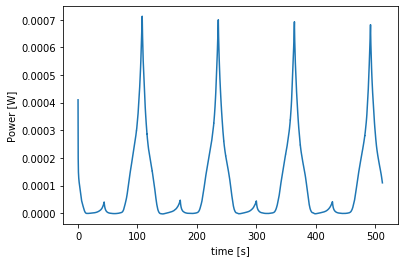

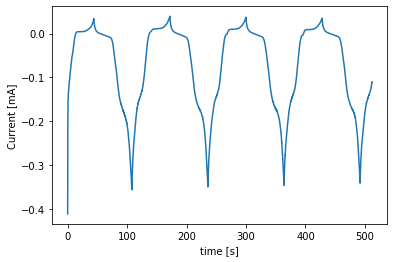

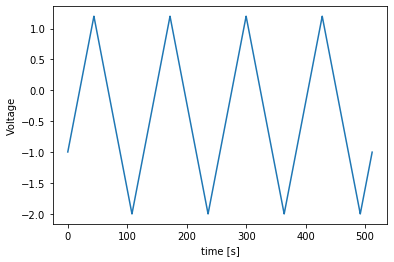

In [6]:
plt.plot(data['time/s'],data['P/W'])
plt.ylabel('Power [W]')
plt.xlabel('time [s]')
plt.show()

plt.plot(data['time/s'],data['<I>/mA'])
plt.ylabel('Current [mA]')
plt.xlabel('time [s]')
plt.show()

plt.plot(data['time/s'],data['Ewe/V'])
plt.ylabel('Voltage')
plt.xlabel('time [s]')
plt.show()

In [7]:
Power = np.array(data['P/W'])
Ewe = np.array(data['Ewe/V'])
Current = np.array(data['<I>/mA'])
cycles = data['cycle number']
time = data['time/s']

In [8]:
#Looking for equilibrium voltage
ocvs = []
print('{:9s} {:17s} {:14s}'.format('time[s]','current [mA]','V'))
for l in range(len(Current)):
    if abs(Current[l]) < 1e-5: #when current ~0
        print('{:5.1f} {:12.1e} {:12.3f}'.format(data['time/s'][l],data['<I>/mA'][l],data['Ewe/V'][l]))
        value = data['Ewe/V'][l] 
        if value > 0:
            ocvs.append(value)
            
# equil_potential = np.average(ocvs)
equil_potential = ocvs[7] #the voltage that corresponds to the smallest value for current in cycle 3
equil_potential

time[s]   current [mA]      V             
 54.4      2.8e-06        0.676
 54.4     -4.9e-06        0.675
184.2      7.2e-06        0.585
184.3      8.8e-06        0.581
312.8      3.1e-06        0.556
312.8     -3.9e-06        0.555
312.9     -4.2e-06        0.554
312.9     -9.8e-07        0.553
312.9     -5.0e-06        0.552
312.9      7.4e-06        0.551
312.9      3.4e-06        0.550
396.6     -6.0e-07       -0.365


0.55315751

In [9]:
E_cycle1 = []
E_cycle2 = []
E_cycle3 = []
E_cycle4 = []

I_cycle1 = []
I_cycle2 = []
I_cycle3 = []
I_cycle4 = []

for m in range(len(cycles)):
    if cycles[m] == 1:
        E_cycle1.append(Ewe[m])
        I_cycle1.append(Current[m])
    elif cycles[m] == 2:
        E_cycle2.append(Ewe[m])
        I_cycle2.append(Current[m])
    elif cycles[m] == 3:
        E_cycle3.append(Ewe[m])
        I_cycle3.append(Current[m])
    elif cycles[m] == 4:
        E_cycle4.append(Ewe[m])
        I_cycle4.append(Current[m])

print(len(E_cycle1), len(E_cycle2), len(E_cycle3), len(E_cycle4))
print('cycles are different lengths- be aware when trying to compare')

6390 6393 6393 6394
cycles are different lengths- be aware when trying to compare


Text(0.5, 0, 'Abs. Value of Current [mA]')

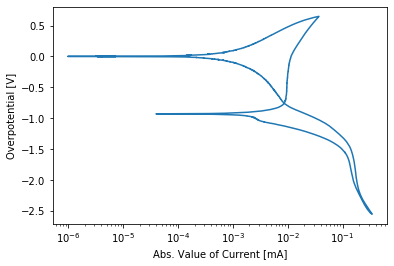

In [10]:
overpotentials = np.array(E_cycle3) - equil_potential
overpotentials

fig, ax = plt.subplots()
# ax.set_xscale('log', basex=np.e)
ax.set_xscale('log', basex=10)
plt.plot(abs(np.array(I_cycle3)),overpotentials)
plt.ylabel('Overpotential [V]')
plt.xlabel('Abs. Value of Current [mA]')

For cycle 3

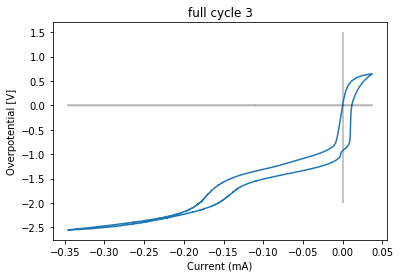

In [11]:
plt.plot(I_cycle3,np.array(E_cycle3)-equil_potential)
plt.plot(I_cycle3,np.zeros_like(I_cycle3),'k',alpha=.3)
plt.ylabel('Overpotential [V]')
plt.xlabel('Current (mA)')
plt.title('full cycle 3')
plt.vlines(0,-2,1.5,alpha=.3)
plt.show()

(0.55315751, -9.779284277181834e-07)

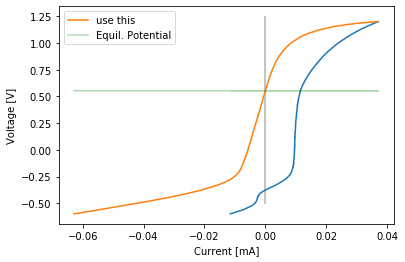

In [12]:
good_V = []
good_I = []

for i in range(len(E_cycle3)):
    if E_cycle3[i]<1.2 and E_cycle3[i]>-0.6:
        good_V.append(E_cycle3[i])
        good_I.append(I_cycle3[i])

h = int(len(good_I)/2)
plt.plot(good_I[0:h],good_V[0:h])
plt.plot(good_I[h:],good_V[h:], label = 'use this')
plt.plot(good_I,np.ones_like(good_I)*equil_potential,'g',label = 'Equil. Potential',alpha=.3)
plt.vlines(0,-.51,1.25,alpha=.3)
plt.ylabel('Voltage [V]')
plt.xlabel('Current [mA]')
plt.legend()
use_V = good_V[h:]
use_I = good_I[h:]

min_index = np.argmin(abs(np.array(use_I)))
equil_potential = use_V[min_index]
use_V[min_index],use_I[min_index]

In [13]:
# plt.plot(np.array(use_v),use_current_densities)
# plt.plot(use_v,np.zeros_like(use_v))
# plt.xlabel('Voltage (V)')
# plt.ylabel('Current density (mA/m^2)')
# plt.show()

def BV(E_cell, j0, aa, ac):
    '''
    takes in cell potential [V] + parameters:j0 [A/m^2],aa,ac
    returns current DENSITY [A/m^2]
    '''
    F = 96485.33212 #C/mol
    R = 8.314 #J/mol-K
    T = 293 #K
#     equil_voltage = 0.5507 #V
#     equil_voltage = 0.3 #V

    #The equil_voltage = cell voltage when current = 0 for cycle 3
    equil_voltage = equil_potential #from above
    overpotential = E_cell - equil_voltage
    z = 2
    
    j = j0*(np.exp(aa*z*F*overpotential*(R*T)**(-1))-np.exp(-ac*z*F*overpotential*(R*T)**(-1)))
    
    return j

### Testing with 1 cycle:

In [14]:
diam_mm = 3 #mm. Diam of RDE used for this experimental data
D = diam_mm/1000
A = np.pi*D**2/4 #m^2
A

7.068583470577034e-06

In [15]:
length = 20
use_current_densities = np.array(use_I)/A/1000 #A/m^2
print('Max current is {:.1f} amps\nMin current is {:.1f} amps'.format(max(use_current_densities),min(use_current_densities)))
j0_guesses = np.linspace(min(use_current_densities),max(use_current_densities),length)
aa0_guesses = np.linspace(0.001,.87,len(j0_guesses))
ac0_guesses = np.linspace(0.003,.9,len(j0_guesses))

#matrix of all combinations of these guesses:
p0s = np.array(np.meshgrid(j0_guesses,aa0_guesses,ac0_guesses)).T.reshape(-1,3)

np.shape(p0s)

Max current is 5.2 amps
Min current is -8.9 amps


(8000, 3)

### Testing with 1 guess

In [16]:
# ans = curve_fit(BV,use_v,use_current_densities,[.5,.5,.5],bounds=([-np.inf,0,0],[np.inf,2,2]),maxfev=4000)
ans = curve_fit(BV,use_V,use_current_densities,[.5,.5,.5],maxfev=4000)
j0_fit, aa_fit, ac_fit = ans[0]
print('j0,aa,ac:', j0_fit, aa_fit, ac_fit)
pcov = ans[1]
perr = np.sqrt(np.diag(pcov))
print('errors:',perr)
print('errors r this % of values:',perr/ans[0]*100 )

j0,aa,ac: -1.0841639856925259e-16 0.499492645082948 0.4999999995300951
errors: [2.31987121e-16 1.12368923e-02 1.10775597e-09]
errors r this % of values: [-2.13977889e+02  2.24966120e+00  2.21551194e-07]


In [17]:
identified_js = []
identified_aas = []
identified_acs = []

for m in range(len(p0s)):
    try: 
        anss = curve_fit(BV,use_V,use_current_densities,p0s[m])
#         anss = curve_fit(BV,use_V,use_I,p0s[m],maxfev=8000)
        gs = anss[0] 
        
        alphas_are_positive = gs[1]>0 and gs[2]>0
        j0_not_zero = gs[0]>1e-4
#         j0_not_zero = True
        different_from_guess = abs(gs[0]-p0s[m,0])>1e-2 and abs(gs[1]-p0s[m,1])>1e-3 and abs(gs[2]-p0s[m,2])>1e-3 
#         different_from_guess = gs[0] - p0s[m,0] !=0 and gs[1]-p0s[m,1]!=0  and gs[2]-p0s[m,2]!=0  
        alphas_big = gs[1]>0.1 and gs[2]>0.1
        a_sum = gs[1] + gs[2]
        one_ish = a_sum < 1.2 and a_sum<.8
        
        if alphas_are_positive and j0_not_zero and different_from_guess:
            print('guess:',p0s[m],'\ngenerated:',anss[0],'\nerrors:',np.sqrt(np.diag(anss[1])),'\n')
            identified_js.append(gs[0])
            identified_aas.append(gs[1])
            print('aa: {:.4f}'.format(gs[1]))
            identified_acs.append(gs[2])
            print('ac: {:.4f}'.format(gs[2]))
#             
    except RuntimeError:
        print('runtime error\n')


guess: [-8.88863048e+00  4.67368421e-02  3.00000000e-03] 
generated: [0.04238588 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.88863048e+00  1.38210526e-01  3.00000000e-03] 
generated: [0.0423858  0.09196781 0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.88863048e+00  1.83947368e-01  3.00000000e-03] 
generated: [0.04238577 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.88863048e+00  2.29684211e-01  3.00000000e-03] 
generated: [0.0423859  0.09196776 0.0588162 ] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.88863048e+00  2.75421053e-01  3.00000000e-03] 
generated: [0.04238575 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.88863048e+00  3.21157895e-01  3.00000000e-03] 
generated: [0.04238603 0.09196769 0.05881616] 
errors: [0.00082874 0.00043478 0.00

guess: [-0.71980107  0.13821053  0.003     ] 
generated: [0.04238585 0.09196778 0.05881622] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-0.71980107  0.18394737  0.003     ] 
generated: [0.04238619 0.09196762 0.05881612] 
errors: [0.00082877 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-0.71980107  0.22968421  0.003     ] 
generated: [0.04238578 0.09196782 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-0.71980107  0.27542105  0.003     ] 
generated: [0.04238596 0.09196773 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-0.71980107  0.32115789  0.003     ] 
generated: [0.04238545 0.09196798 0.05881633] 
errors: [0.00082865 0.0004348  0.00023486] 

aa: 0.0920
ac: 0.0588
guess: [0.02281979 0.001      0.003     ] 
generated: [0.04238585 0.09196778 0.05881622] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.02281979 0.04673684 0.003     ] 


guess: [5.22116578e+00 4.67368421e-02 3.00000000e-03] 
generated: [0.04238588 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578e+00 1.38210526e-01 3.00000000e-03] 
generated: [0.04238573 0.09196784 0.05881625] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578e+00 1.83947368e-01 3.00000000e-03] 
generated: [0.04238584 0.09196779 0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578e+00 2.29684211e-01 3.00000000e-03] 
generated: [0.04238576 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578e+00 2.75421053e-01 3.00000000e-03] 
generated: [0.04238575 0.09196783 0.05881625] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578e+00 3.21157895e-01 3.00000000e-03] 
generated: [0.04238595 0.09196773 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.09

guess: [-4.43290535  0.27542105  0.05021053] 
generated: [0.04238598 0.09196772 0.05881618] 
errors: [0.00082874 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-4.43290535  0.32115789  0.05021053] 
generated: [0.04238593 0.09196775 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-4.43290535  0.36689474  0.05021053] 
generated: [0.04238599 0.09196771 0.05881618] 
errors: [0.00082874 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-3.69028449e+00  1.00000000e-03  5.02105263e-02] 
generated: [0.04238587 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-3.69028449  0.04673684  0.05021053] 
generated: [0.042386   0.09196771 0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-3.69028449  0.13821053  0.05021053] 
generated: [0.04238586 0.09196778 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-3.69028449  0.18394

guess: [1.5080615  0.22968421 0.05021053] 
generated: [0.04238605 0.09196769 0.05881616] 
errors: [0.00082875 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.27542105 0.05021053] 
generated: [0.04238602 0.0919677  0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.32115789 0.05021053] 
generated: [0.04238597 0.09196773 0.05881618] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.36689474 0.05021053] 
generated: [0.04238597 0.09196772 0.05881618] 
errors: [0.00082874 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.45836842 0.05021053] 
generated: [0.04238543 0.09196799 0.05881634] 
errors: [0.00082865 0.0004348  0.00023486] 

aa: 0.0920
ac: 0.0588
guess: [2.25068235e+00 1.00000000e-03 5.02105263e-02] 
generated: [0.04238586 0.09196778 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.25068235 0.04673684 0.05021053] 
gen

guess: [-8.14600962  0.36689474  0.09742105] 
generated: [0.04238581 0.0919678  0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.14600962  0.41263158  0.09742105] 
generated: [0.04238594 0.09196774 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.14600962  0.45836842  0.09742105] 
generated: [0.04238576 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-7.40338877e+00  1.00000000e-03  9.74210526e-02] 
generated: [0.04238576 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-7.40338877  0.04673684  0.09742105] 
generated: [0.04238601 0.09196771 0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-7.40338877  0.13821053  0.09742105] 
generated: [0.04238556 0.09196793 0.0588163 ] 
errors: [0.00082867 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-7.40338877  0.18394

guess: [-3.69028449  0.13821053  0.09742105] 
generated: [0.04238556 0.09196793 0.0588163 ] 
errors: [0.00082867 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-3.69028449  0.18394737  0.09742105] 
generated: [0.04238568 0.09196787 0.05881627] 
errors: [0.00082869 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-3.69028449  0.22968421  0.09742105] 
generated: [0.04238589 0.09196776 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-3.69028449  0.27542105  0.09742105] 
generated: [0.04238602 0.0919677  0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-3.69028449  0.32115789  0.09742105] 
generated: [0.04238584 0.09196779 0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-3.69028449  0.36689474  0.09742105] 
generated: [0.04238575 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-3.69028449  0.41263158  0.09742

guess: [0.76544064 0.18394737 0.09742105] 
generated: [0.04238569 0.09196786 0.05881626] 
errors: [0.00082869 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.22968421 0.09742105] 
generated: [0.0423859  0.09196776 0.0588162 ] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.27542105 0.09742105] 
generated: [0.04238602 0.0919677  0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.32115789 0.09742105] 
generated: [0.04238584 0.09196779 0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.36689474 0.09742105] 
generated: [0.04238573 0.09196784 0.05881625] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.41263158 0.09742105] 
generated: [0.04238576 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.45836842 0.09742105] 
generated: [0.0

guess: [4.47854492 0.41263158 0.09742105] 
generated: [0.04238547 0.09196797 0.05881632] 
errors: [0.00082866 0.0004348  0.00023486] 

aa: 0.0920
ac: 0.0588
guess: [4.47854492 0.45836842 0.09742105] 
generated: [0.0423856  0.09196791 0.05881629] 
errors: [0.00082867 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578e+00 1.00000000e-03 9.74210526e-02] 
generated: [0.04238577 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578 0.04673684 0.09742105] 
generated: [0.04238582 0.0919678  0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578 0.13821053 0.09742105] 
generated: [0.04238554 0.09196794 0.0588163 ] 
errors: [0.00082867 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578 0.18394737 0.09742105] 
generated: [0.04238568 0.09196787 0.05881626] 
errors: [0.00082869 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578 0.22968421 0.09742105] 
gen

guess: [-6.66076791  0.50410526  0.14463158] 
generated: [0.04238592 0.09196775 0.0588162 ] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-6.66076791  0.54984211  0.14463158] 
generated: [0.0423855  0.09196795 0.05881632] 
errors: [0.00082866 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-6.66076791  0.59557895  0.14463158] 
generated: [0.04238581 0.0919678  0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.91814706e+00  1.00000000e-03  1.44631579e-01] 
generated: [0.0423857  0.09196786 0.05881626] 
errors: [0.00082869 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.91814706  0.04673684  0.14463158] 
generated: [0.04238589 0.09196776 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.91814706  0.13821053  0.14463158] 
generated: [0.04238585 0.09196778 0.05881622] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.91814706  0.18394

C:\Users\MaryLou\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


guess: [-4.43290535  0.27542105  0.14463158] 
generated: [0.04238581 0.0919678  0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-4.43290535  0.32115789  0.14463158] 
generated: [0.04238587 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-4.43290535  0.36689474  0.14463158] 
generated: [0.04238591 0.09196776 0.0588162 ] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-4.43290535  0.41263158  0.14463158] 
generated: [0.04238581 0.09196781 0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-4.43290535  0.45836842  0.14463158] 
generated: [0.04238584 0.09196779 0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-4.43290535  0.50410526  0.14463158] 
generated: [0.04238602 0.0919677  0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-3.69028449e+00  1.00000000e-03 

guess: [-0.71980107  0.001       0.14463158] 
generated: [0.04238601 0.09196771 0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-0.71980107  0.04673684  0.14463158] 
generated: [0.04238602 0.0919677  0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-0.71980107  0.13821053  0.14463158] 
generated: [0.04238576 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-0.71980107  0.18394737  0.14463158] 
generated: [0.04238585 0.09196778 0.05881622] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-0.71980107  0.22968421  0.14463158] 
generated: [0.04238577 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-0.71980107  0.27542105  0.14463158] 
generated: [0.04238581 0.09196781 0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-0.71980107  0.32115789  0.14463

guess: [2.99330321e+00 1.00000000e-03 1.44631579e-01] 
generated: [0.04238596 0.09196773 0.05881618] 
errors: [0.00082873 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.99330321 0.04673684 0.14463158] 
generated: [0.04238594 0.09196774 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.99330321 0.13821053 0.14463158] 
generated: [0.04238585 0.09196778 0.05881622] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.99330321 0.18394737 0.14463158] 
generated: [0.04238584 0.09196779 0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.99330321 0.22968421 0.14463158] 
generated: [0.04238577 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.99330321 0.27542105 0.14463158] 
generated: [0.04238581 0.09196781 0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.99330321 0.32115789 0.14463158] 
gen

guess: [-8.88863048  0.59557895  0.19184211] 
generated: [0.0423859  0.09196776 0.0588162 ] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.14600962e+00  1.00000000e-03  1.91842105e-01] 
generated: [0.042386   0.09196771 0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.14600962  0.04673684  0.19184211] 
generated: [0.0423854  0.091968   0.05881634] 
errors: [0.00082864 0.0004348  0.00023486] 

aa: 0.0920
ac: 0.0588
guess: [-8.14600962  0.13821053  0.19184211] 
generated: [0.04238581 0.0919678  0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.14600962  0.18394737  0.19184211] 
generated: [0.04238596 0.09196773 0.05881618] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.14600962  0.22968421  0.19184211] 
generated: [0.04238588 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.14600962  0.27542

guess: [-5.1755262   0.36689474  0.19184211] 
generated: [0.04238582 0.0919678  0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.1755262   0.41263158  0.19184211] 
generated: [0.04238597 0.09196772 0.05881618] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.1755262   0.45836842  0.19184211] 
generated: [0.04238577 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.1755262   0.50410526  0.19184211] 
generated: [0.04238594 0.09196774 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.1755262   0.54984211  0.19184211] 
generated: [0.04238583 0.09196779 0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.1755262   0.59557895  0.19184211] 
generated: [0.04238565 0.09196788 0.05881627] 
errors: [0.00082868 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-4.43290535  0.04673684  0.19184

guess: [-2.20504278  0.59557895  0.19184211] 
generated: [0.04238575 0.09196783 0.05881625] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-1.46242192  0.04673684  0.19184211] 
generated: [0.04238589 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-1.46242192  0.13821053  0.19184211] 
generated: [0.04238596 0.09196773 0.05881618] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-1.46242192  0.18394737  0.19184211] 
generated: [0.04238596 0.09196773 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-1.46242192  0.22968421  0.19184211] 
generated: [0.04238588 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-1.46242192  0.27542105  0.19184211] 
generated: [0.04238539 0.09196801 0.05881635] 
errors: [0.00082864 0.0004348  0.00023486] 

aa: 0.0920
ac: 0.0588
guess: [-1.46242192  0.32115789  0.19184

guess: [0.76544064 0.68705263 0.19184211] 
generated: [0.04238547 0.09196797 0.05881633] 
errors: [0.00082865 0.0004348  0.00023486] 

aa: 0.0920
ac: 0.0588
guess: [1.50806150e+00 1.00000000e-03 1.91842105e-01] 
generated: [0.04238589 0.09196776 0.0588162 ] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.04673684 0.19184211] 
generated: [0.04238577 0.09196782 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.13821053 0.19184211] 
generated: [0.042386   0.09196771 0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.18394737 0.19184211] 
generated: [0.04238596 0.09196773 0.05881618] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.22968421 0.19184211] 
generated: [0.04238592 0.09196775 0.0588162 ] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.27542105 0.19184211] 
gen

guess: [4.47854492 0.50410526 0.19184211] 
generated: [0.04238581 0.0919678  0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [4.47854492 0.54984211 0.19184211] 
generated: [0.04238578 0.09196782 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [4.47854492 0.59557895 0.19184211] 
generated: [0.04238567 0.09196787 0.05881627] 
errors: [0.00082869 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578e+00 1.00000000e-03 1.91842105e-01] 
generated: [0.04238575 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578 0.13821053 0.19184211] 
generated: [0.04238597 0.09196773 0.05881618] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578 0.18394737 0.19184211] 
generated: [0.04238596 0.09196773 0.05881618] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [5.22116578 0.22968421 0.19184211] 
gen

guess: [-6.66076791  0.64131579  0.23905263] 
generated: [0.04238591 0.09196776 0.0588162 ] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-6.66076791  0.68705263  0.23905263] 
generated: [0.04238572 0.09196785 0.05881625] 
errors: [0.00082869 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.91814706  0.18394737  0.23905263] 
generated: [0.04238588 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.91814706  0.22968421  0.23905263] 
generated: [0.04238601 0.09196771 0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.91814706  0.27542105  0.23905263] 
generated: [0.04238539 0.09196801 0.05881635] 
errors: [0.00082864 0.0004348  0.00023486] 

aa: 0.0920
ac: 0.0588
guess: [-5.91814706  0.32115789  0.23905263] 
generated: [0.04238619 0.09196762 0.05881612] 
errors: [0.00082877 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.91814706  0.36689474  0.23905

guess: [-2.94766363  0.54984211  0.23905263] 
generated: [0.04238588 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.94766363  0.59557895  0.23905263] 
generated: [0.04238596 0.09196773 0.05881618] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.94766363  0.64131579  0.23905263] 
generated: [0.04238583 0.09196779 0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.94766363  0.68705263  0.23905263] 
generated: [0.04238576 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.18394737  0.23905263] 
generated: [0.04238591 0.09196775 0.0588162 ] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.22968421  0.23905263] 
generated: [0.04238601 0.09196771 0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.27542105  0.23905

guess: [0.02281979 0.68705263 0.23905263] 
generated: [0.04238552 0.09196795 0.05881631] 
errors: [0.00082866 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.18394737 0.23905263] 
generated: [0.04238591 0.09196775 0.0588162 ] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.22968421 0.23905263] 
generated: [0.04238601 0.09196771 0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.27542105 0.23905263] 
generated: [0.04238594 0.09196774 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.32115789 0.23905263] 
generated: [0.04238609 0.09196767 0.05881615] 
errors: [0.00082875 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.36689474 0.23905263] 
generated: [0.04238578 0.09196782 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.41263158 0.23905263] 
generated: [0.0

guess: [3.73592406 0.64131579 0.23905263] 
generated: [0.04238593 0.09196774 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [3.73592406 0.68705263 0.23905263] 
generated: [0.0423857  0.09196786 0.05881626] 
errors: [0.00082869 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [4.47854492 0.18394737 0.23905263] 
generated: [0.0423859  0.09196776 0.0588162 ] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [4.47854492 0.22968421 0.23905263] 
generated: [0.04238575 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [4.47854492 0.27542105 0.23905263] 
generated: [0.04238547 0.09196797 0.05881633] 
errors: [0.00082865 0.0004348  0.00023486] 

aa: 0.0920
ac: 0.0588
guess: [4.47854492 0.32115789 0.23905263] 
generated: [0.04238596 0.09196773 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [4.47854492 0.36689474 0.23905263] 
generated: [0.0

guess: [-7.40338877  0.64131579  0.28626316] 
generated: [0.04238604 0.09196769 0.05881616] 
errors: [0.00082875 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-7.40338877  0.68705263  0.28626316] 
generated: [0.04238581 0.0919678  0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-6.66076791  0.22968421  0.28626316] 
generated: [0.04238595 0.09196774 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-6.66076791  0.27542105  0.28626316] 
generated: [0.04238583 0.09196779 0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-6.66076791  0.32115789  0.28626316] 
generated: [0.04238594 0.09196774 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-6.66076791  0.36689474  0.28626316] 
generated: [0.04238594 0.09196774 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-6.66076791  0.41263158  0.28626

guess: [-3.69028449  0.64131579  0.28626316] 
generated: [0.04238577 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-3.69028449  0.68705263  0.28626316] 
generated: [0.04238576 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.94766363  0.22968421  0.28626316] 
generated: [0.04238601 0.0919677  0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.94766363  0.27542105  0.28626316] 
generated: [0.04238583 0.0919678  0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.94766363  0.32115789  0.28626316] 
generated: [0.04238576 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.94766363  0.36689474  0.28626316] 
generated: [0.04238577 0.09196782 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.94766363  0.41263158  0.28626

guess: [0.02281979 0.64131579 0.28626316] 
generated: [0.04238559 0.09196791 0.05881629] 
errors: [0.00082867 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.02281979 0.68705263 0.28626316] 
generated: [0.04238566 0.09196788 0.05881627] 
errors: [0.00082868 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.02281979 0.73278947 0.28626316] 
generated: [0.04238548 0.09196796 0.05881632] 
errors: [0.00082866 0.00043479 0.00023486] 

aa: 0.0920
ac: 0.0588
guess: [0.02281979 0.77852632 0.28626316] 
generated: [0.04238567 0.09196788 0.05881627] 
errors: [0.00082869 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.22968421 0.28626316] 
generated: [0.04238598 0.09196772 0.05881618] 
errors: [0.00082874 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.27542105 0.28626316] 
generated: [0.04238594 0.09196774 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [0.76544064 0.32115789 0.28626316] 
generated: [0.0

guess: [3.73592406 0.59557895 0.28626316] 
generated: [0.04238585 0.09196778 0.05881622] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [3.73592406 0.64131579 0.28626316] 
generated: [0.04238588 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [3.73592406 0.68705263 0.28626316] 
generated: [0.04238585 0.09196778 0.05881622] 
errors: [0.00082871 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [4.47854492 0.22968421 0.28626316] 
generated: [0.04238585 0.09196779 0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [4.47854492 0.27542105 0.28626316] 
generated: [0.04238576 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [4.47854492 0.32115789 0.28626316] 
generated: [0.04238589 0.09196776 0.0588162 ] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [4.47854492 0.36689474 0.28626316] 
generated: [0.0

guess: [-6.66076791  0.54984211  0.33347368] 
generated: [0.04238589 0.09196776 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-6.66076791  0.59557895  0.33347368] 
generated: [0.04238586 0.09196778 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-6.66076791  0.64131579  0.33347368] 
generated: [0.04238582 0.0919678  0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-6.66076791  0.68705263  0.33347368] 
generated: [0.0423859  0.09196776 0.0588162 ] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.91814706  0.32115789  0.33347368] 
generated: [0.04238585 0.09196778 0.05881622] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.91814706  0.36689474  0.33347368] 
generated: [0.04238595 0.09196774 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-5.91814706  0.41263158  0.33347

guess: [-2.20504278  0.36689474  0.33347368] 
generated: [0.04238585 0.09196779 0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.41263158  0.33347368] 
generated: [0.0423859  0.09196776 0.0588162 ] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.45836842  0.33347368] 
generated: [0.04238576 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.50410526  0.33347368] 
generated: [0.04238585 0.09196779 0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.54984211  0.33347368] 
generated: [0.04238599 0.09196771 0.05881618] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.59557895  0.33347368] 
generated: [0.04238595 0.09196773 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.64131579  0.33347

guess: [1.5080615  0.50410526 0.33347368] 
generated: [0.042386   0.09196771 0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.54984211 0.33347368] 
generated: [0.04238605 0.09196768 0.05881616] 
errors: [0.00082875 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.59557895 0.33347368] 
generated: [0.04238592 0.09196775 0.0588162 ] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.64131579 0.33347368] 
generated: [0.04238589 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.68705263 0.33347368] 
generated: [0.04238588 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [1.5080615  0.73278947 0.33347368] 
generated: [0.04238574 0.09196784 0.05881625] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.25068235 0.27542105 0.33347368] 
generated: [0.0

guess: [-8.88863048  0.59557895  0.38068421] 
generated: [0.04238606 0.09196768 0.05881616] 
errors: [0.00082875 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.88863048  0.64131579  0.38068421] 
generated: [0.04238574 0.09196784 0.05881625] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.88863048  0.68705263  0.38068421] 
generated: [0.0423858  0.09196781 0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.14600962  0.41263158  0.38068421] 
generated: [0.04238576 0.09196783 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.14600962  0.45836842  0.38068421] 
generated: [0.04238573 0.09196784 0.05881625] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.14600962  0.50410526  0.38068421] 
generated: [0.04238591 0.09196775 0.0588162 ] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-8.14600962  0.54984211  0.38068

guess: [-2.94766363  0.59557895  0.38068421] 
generated: [0.04238598 0.09196772 0.05881618] 
errors: [0.00082874 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.94766363  0.64131579  0.38068421] 
generated: [0.04238587 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.94766363  0.68705263  0.38068421] 
generated: [0.04238572 0.09196785 0.05881625] 
errors: [0.00082869 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.36689474  0.38068421] 
generated: [0.04238584 0.09196779 0.05881622] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.41263158  0.38068421] 
generated: [0.04238586 0.09196778 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.45836842  0.38068421] 
generated: [0.04238577 0.09196782 0.05881624] 
errors: [0.0008287  0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.50410526  0.38068

guess: [2.25068235 0.36689474 0.38068421] 
generated: [0.04238587 0.09196778 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.25068235 0.41263158 0.38068421] 
generated: [0.04238595 0.09196773 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.25068235 0.45836842 0.38068421] 
generated: [0.0423859  0.09196776 0.0588162 ] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.25068235 0.50410526 0.38068421] 
generated: [0.04238589 0.09196776 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.25068235 0.54984211 0.38068421] 
generated: [0.04238587 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.25068235 0.59557895 0.38068421] 
generated: [0.042386   0.09196771 0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.25068235 0.64131579 0.38068421] 
generated: [0.0

guess: [-2.20504278  0.50410526  0.42789474] 
generated: [0.04238591 0.09196775 0.0588162 ] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.54984211  0.42789474] 
generated: [0.04238579 0.09196781 0.05881623] 
errors: [0.00082871 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.59557895  0.42789474] 
generated: [0.04238588 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.64131579  0.42789474] 
generated: [0.04238544 0.09196799 0.05881633] 
errors: [0.00082865 0.0004348  0.00023486] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.68705263  0.42789474] 
generated: [0.04238588 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.73278947  0.42789474] 
generated: [0.04238589 0.09196776 0.05881621] 
errors: [0.00082872 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.77852632  0.42789

C:\Users\MaryLou\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in multiply


guess: [-8.14600962  0.04673684  0.52231579] 
generated: [0.04238593 0.09196775 0.05881619] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-4.43290535  0.04673684  0.52231579] 
generated: [0.04238587 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-2.20504278  0.04673684  0.52231579] 
generated: [0.04238596 0.09196773 0.05881618] 
errors: [0.00082873 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [-1.46242192  0.04673684  0.52231579] 
generated: [0.04238586 0.09196778 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
runtime error

guess: [0.76544064 0.04673684 0.52231579] 
generated: [0.04238603 0.0919677  0.05881617] 
errors: [0.00082874 0.00043478 0.00023485] 

aa: 0.0920
ac: 0.0588
guess: [2.99330321 0.04673684 0.52231579] 
generated: [0.04238587 0.09196777 0.05881621] 
errors: [0.00082872 0.00043479 0.00023485] 

aa: 0.0920
ac: 0.0588
runtime error

runtime error

r

In [18]:
print(len(identified_js),len(identified_aas),len(identified_acs))
print('Relative Stdvs:\nj0_fit: {:.3f}\naa_fit: {:.3f}\nac_fit:{:.3f}\n'.format(np.std(identified_js)/np.average(identified_js),
                                                                              np.std(identified_aas)/np.average(identified_aas),
                                                                              np.std(identified_acs)/np.average(identified_acs)))
j0_fit = np.average(identified_js)
aa_fit = np.average(identified_aas)
ac_fit = np.average(identified_acs)

print('Values: \nj0_fit: {:.3f}\naa_fit: {:.3f}\nac_fit:{:.3f}'.format(j0_fit, aa_fit, ac_fit))

1844 1844 1844
Relative Stdvs:
j0_fit: 0.000
aa_fit: 0.000
ac_fit:0.000

Values: 
j0_fit: 0.042
aa_fit: 0.092
ac_fit:0.059


(0.042385824983355455, 0.09196779618296232, 0.05881622371330493)


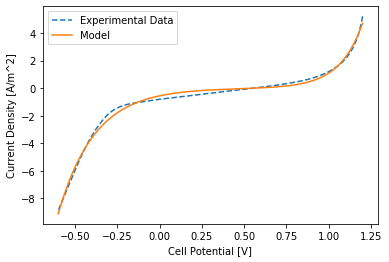

In [19]:
# paramys = [0.05151305, 0.37046147, 0.37045137]
paramys =j0_fit, aa_fit, ac_fit
# paramys = [5.27220332e-02, 8.16570098e-02, 4.85197831e-02]
# paramys =[(1.08614495e-05), 2.19024473e-01, 8.93331622e-01]
# paramys = [-.01,.4,.5]
print(paramys)
j_fits = BV(np.array(use_V),*paramys) #AMPS/m^2
# plt.plot(np.array(use_v)-0.544,np.zeros_like(use_v),'k',alpha=0.3)
# plt.vlines(0,-4.2,4.2, alpha=0.3)
plt.plot(np.array(use_V),use_current_densities, '--',label='Experimental Data')
# plt.plot(np.array(use_V),np.array(use_I), '--',label='Experimental Data')
plt.plot(np.array(use_V),j_fits,label='Model')
plt.ylabel('Current Density [A/m^2]')
# plt.ylabel('Current [mA]')
plt.xlabel('Cell Potential [V]')
# plt.xlim(.1,1.25)
# plt.ylim(-.1,.1)
plt.legend()
# plt.savefig('model_vs_data.png',dpi=100)

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('voltage')
# ax1.set_ylabel('data I', color=color)
# ax1.plot(use_v,use_current_densities, '--',color=color)
# # ax1.plot(times,Power_demands, '*',color='tab:grey',label = 'Power Demand (kW)')
# ax1.tick_params(axis='y', labelcolor=color)
# # plt.legend(loc = 'upper center')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('model I', color=color)  # we already handled the x-label with ax1
# ax2.plot(use_v, j_fits, '-',color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plt.show()